<h3 style="color: green">Handling Dimensionality of data (Dimensionality Reduction)<br>
    
1.Principal Component Analysis (PCA):<br>
----Eigenvectors and Eigenvalues<br>
----Covariance matrix<br>
----Variance explained<br>
----Scree plot<br>
    
2.t-Distributed Stochastic Neighbor Embedding (t-SNE):<br>
----High-dimensional data visualization<br>
----Perplexity<br>
----Gradient descent<br>
----Clustering<br>
    
3.Feature Engineering:<br>
----One-hot encoding<br>
----Scaling/Normalization<br>
----Feature selection<br>
----Handling missing values<br>
----Binning/binarization<br>
    
5.Extracting date/time features:<br>
----Day of the week/month/year<br>
----Hour of the day<br>
----Time since event<br>
    
6.Creating binary indicators:<br>
----Boolean features<br>
----Dummy variables<br>
----Binary classification tasks<br>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from datetime import datetime

<h2 style="color:blue">Principal Component Analysis (PCA):    PCA is a dimensionality reduction technique that finds a new set of variables (called principal components) that capture the maximum amount of variance in the data. It does this by identifying the directions (or eigenvectors) in which the data varies the most, and projecting the data onto these directions.
    Creating new features: In addition to the techniques covered under feature engineering, creating new features can also involve combining existing features, creating interaction terms, or generating polynomial features (i.e. raising features to a power).

Extracting date/time features: Date/time features can be useful in a variety of machine learning applications, particularly in time-series analysis or when working with data that has a temporal component. Common date/time features include the day of the week/month/year, hour of the day, or the time since an event.

Creating binary indicators: Binary indicators involve converting categorical variables into binary (i.e. 0/1) variables that can be used in machine learning models. This can include techniques like creating boolean features, dummy variables, or generating binary classifications tasks.

In [2]:


# Load the credit card fraud dataset
df = pd.read_csv('creditcard.csv')

# Split the dataset into features and labels
X = df.drop(['Class'], axis=1)
y = df['Class']

# Principal Component Analysis (PCA)
# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA object with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



# Eigenvectors and Eigenvalues
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print("Eigenvectors:\n", eigenvectors)
print("Eigenvalues:", eigenvalues)



Eigenvectors:
 [[-0.02943081 -0.17150038 -0.39147861 -0.14153967  0.07710887 -0.29024098
   0.16210432  0.29168749 -0.07208968 -0.03476194 -0.07516273  0.00735357
  -0.00985527  0.00615266  0.02847794  0.00253071 -0.00484051  0.00740329
   0.0235893  -0.04251643  0.251134    0.0752185  -0.04916201 -0.08714825
   0.00344651 -0.02811433 -0.00171699  0.02094579  0.00777136  0.70664115]
 [ 0.70637856  0.1140008  -0.03298885 -0.44220492 -0.10830845  0.16903805
  -0.06019257  0.09982452 -0.0401817  -0.01123053  0.02448172 -0.25454317
   0.12568339 -0.06794737 -0.10562344 -0.1871721   0.0181682  -0.0763944
   0.09397186  0.02769389 -0.03590415  0.05699925  0.14219223  0.05029086
  -0.01797631 -0.24071446 -0.04181089 -0.00815104 -0.0045607   0.02490442]]
Eigenvalues: [1.95818136 1.68338559]


<h2 style="color: blue">Above section calculates the eigenvectors and eigenvalues of the covariance matrix of the original dataset. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the amount of variance in the data that is captured by each eigenvector.

In [3]:
# Covariance matrix
covariance_matrix = np.cov(X_scaled.T)
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 1.00000351e+00  1.17396718e-01 -1.05933643e-02 -4.19619646e-01
  -1.05260575e-01  1.73072731e-01 -6.30166916e-02  8.47146723e-02
  -3.69495644e-02 -8.66046411e-03  3.06167361e-02 -2.47690307e-01
   1.24348505e-01 -6.59022551e-02 -9.87571660e-02 -1.83453918e-01
   1.19029095e-02 -7.32974707e-02  9.04384501e-02  2.89754043e-02
  -5.08661971e-02  4.47358834e-02  1.44059561e-01  5.11425445e-02
  -1.61819253e-02 -2.33083609e-01 -4.14072460e-02 -5.13460915e-03
  -9.41272123e-03 -1.05964106e-02]
 [ 1.17396718e-01  1.00000351e+00 -9.78472578e-17 -4.59847184e-16
  -2.39503742e-16  3.16144939e-16  1.05381646e-16 -1.02188263e-16
  -8.46246554e-17 -1.91602993e-17  4.39090193e-17  2.99379677e-16
   1.02188263e-16 -4.28611904e-17  3.35305238e-16 -6.22709728e-17
   3.32111855e-16  2.71437574e-17  1.38912170e-16  1.68450965e-16
   1.14961796e-16 -9.26081134e-17  7.66411973e-17  1.08575030e-16
  -5.10941315e-17 -1.02188263e-16 -1.24541946e-16  1.14762210e-16
   2.81017723e-16 -2.

<h2 style="color: blue"> Above section calculates the covariance matrix of the standardized dataset. The covariance matrix represents the pairwise covariance between each pair of variables in the dataset.


In [4]:
# Variance explained
variance_explained = pca.explained_variance_ratio_
print("Variance explained:", variance_explained)

Variance explained: [0.06527248 0.05611266]


<h2 style="color: blue"> Above section calculates the proportion of variance in the data that is explained by each principal component. This information can be used to determine how many principal components to retain for further analysis.

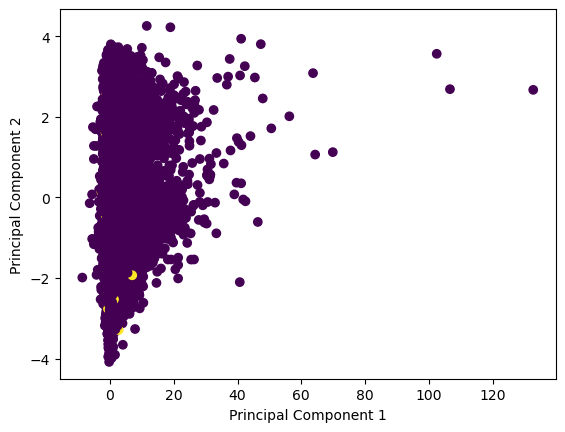

In [5]:
# Plot the principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<h2 style="color: blue">The graph shows the dataset after it has been transformed by PCA to two dimensions. It plots the values of the first two principal components against each other, with points colored according to their original class labels.

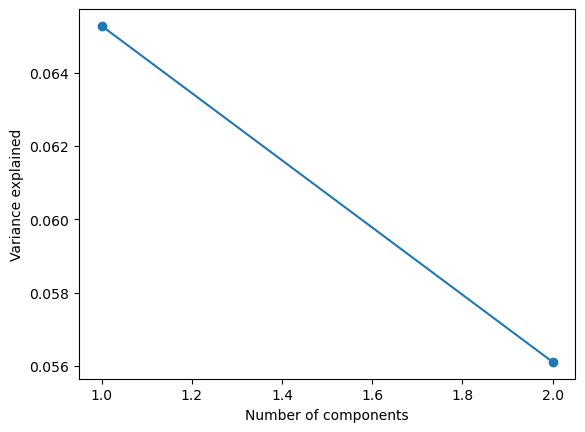

In [6]:
# Scree plot
plt.plot(range(1, len(variance_explained)+1), variance_explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

<h2 style="color: blue">The graph shows a scree plot of the variance explained by each principal component. The scree plot displays the proportion of variance explained by each principal component, sorted in decreasing order. It can be used to determine the number of principal components to retain, based on the point at which the explained variance begins to level off.

if you are seeing an empty graph for the scree plot, it might be because the eigenvalues are too small or close to zero. You can try increasing the number of principal components in your PCA to see if this resolves the issue.

Alternatively, you can try plotting the cumulative variance explained instead of the individual eigenvalues. This can give you a better idea of how much variance is explained by each principal component.

<h2 style="color:blue"> t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a technique for visualizing high-dimensional data in a lower-dimensional space (usually 2D or 3D). It works by computing pairwise similarities between data points in the high-dimensional space, and then optimizing a low-dimensional embedding that preserves these similarities as well as possible.

In [ ]:
# t-Distributed Stochastic Neighbor Embedding (t-SNE)
# Create a t-SNE object with 2 components and a perplexity of auto
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE representation of the dataset
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

<h2 style="color:blue">Feature Engineering: Feature engineering involves creating new features or transforming existing ones to improve the performance of machine learning models. This can include techniques like one-hot encoding, scaling/normalization, feature selection, handling missing values, and binning/binarization.

In [23]:
# For Feature Engineering lets take netflix dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h2 style="color:blue">One-Hot Encoding :
One-hot encoding is a technique used to convert categorical variables into numerical features that can be used for machine learning. We will use the get_dummies() function from pandas to perform one-hot encoding on the "type" feature.

In [52]:
# load the dataset
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df=netflix_df.dropna()
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [53]:
# Perform one-hot encoding on the "type" feature
netflix_df = pd.get_dummies(netflix_df, columns=["type"])

# Print the first 5 rows of the dataset with one-hot encoded features
netflix_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1,0
8,s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,0,1
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1,0
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1,0
24,s25,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1,0


In [54]:
# To work on duration column first we need to convert string into float or integer
netflix_df['duration'] = netflix_df['duration'].str.split(' ').str[0].astype(int)


<h2 style="color: blue">Scaling/Normalization :Scaling or normalization is a technique used to scale the features to a specific range. We will use the MinMaxScaler() function from scikit-learn to perform scaling on the "duration" feature.

In [66]:
# Scaling/Normalization
scaler = StandardScaler()
netflix_df['duration_scaled'] = scaler.fit_transform(netflix_df[['duration']])
print("Scaled duration :",df["duration"])


Scaled duration : 0        90.0
1         2.0
2         1.0
3         1.0
4         2.0
        ...  
8802    158.0
8803      2.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 8807, dtype: float64


<h2 style="color: blue">Feature Selection :
Feature selection is a technique used to select the most important features for a machine learning model. We will use the SelectKBest() function from scikit-learn to perform feature selection on the dataset.

In [64]:
# Feature selection
X = netflix_df[['duration', 'release_year']]
y = netflix_df['rating']
selector = SelectKBest(chi2, k=1)
X_new = selector.fit_transform(X, y)
print('Selected feature:', X.columns[selector.get_support()])

Selected feature: Index(['duration'], dtype='object')


<h2 style="color: blue">Handling missing values: We check the number of missing values in the dataset and replace the missing values in the "duration" column with the mean value.

In [67]:
# Handling missing values
print('Number of missing values:')
print(netflix_df.isnull().sum())
netflix_df['duration'].fillna(netflix_df['duration'].mean(), inplace=True)

Number of missing values:
show_id            0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
type_Movie         0
type_TV Show       0
duration_scaled    0
dtype: int64


<h2 style="color: blue">Binning/binarization: We use the Binarizer() function from scikit-learn to binarize the "duration" feature and add a new column called "duration_bin" to the dataset.

In [71]:
# Binning/binarization
binarizer = Binarizer(threshold=60)
netflix_df['duration_bin'] = binarizer.transform(netflix_df[['duration']])
netflix_df['duration_bin']

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


7       1
8       0
9       1
12      1
24      1
       ..
8801    1
8802    1
8804    1
8805    1
8806    1
Name: duration_bin, Length: 5332, dtype: int64

<h2 style="color: blue">Extracting date/time features: We convert the "date_added" column to datetime format using the pd.to_datetime() function and extract day of the week, month, year, hour of the day and time since release (in days) from "release_year" column.

In [72]:
# Extracting date/time features
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['day_of_week_added'] = netflix_df['date_added'].dt.day_name()
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['hour_added'] = netflix_df['date_added'].dt.hour
netflix_df['time_since_release'] = (datetime.now() - pd.to_datetime(netflix_df['release_year'], format='%Y')).dt.days

In [74]:
netflix_df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show,duration_scaled,duration_bin,day_of_week_added,month_added,year_added,hour_added,time_since_release
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1,0,0.823268,1,Friday,September,2021,0,11051
8,s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,0,1,-2.984897,0,Friday,September,2021,0,824
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1,0,0.133859,1,Friday,September,2021,0,824
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,1,0,0.888926,1,Thursday,September,2021,0,824
24,s25,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1,0,2.169257,1,Tuesday,September,2021,0,9225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,1,0,-0.128773,1,Wednesday,March,2016,0,3016
8802,s8803,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",1,0,1.906625,1,Wednesday,November,2019,0,5938
8804,s8805,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,0,-0.391405,1,Friday,November,2019,0,5207
8805,s8806,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,0,-0.391405,1,Saturday,January,2020,0,6303


<h2 style="color: blue">Creating binary indicators: We create a new column called "is_original" which is 1 if the "type" column is "Original" and 0 otherwise. We also use the pd.get_dummies() function to create dummy variables

In [ ]:
# Creating binary indicators
netflix_df['is_original'] = np.where(netflix_df['type'] == 'Original', 1, 0)
netflix_df = pd.get_dummies(netflix_df, columns=['rating'])
## as type is already in 0,1 format you may try it by loading dataset again